In [2]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 248 kB/s 


In [3]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from numpy import mean
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import operator
import itertools
import operator
from itertools import islice
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
data = pd.read_excel('data-2.xlsx')
del data['Unnamed: 0']
data = data.rename(columns={'TOTS.1': 'TOTS_Teammates'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  92120 non-null  int64  
 1   Name                92120 non-null  object 
 2   Age                 92120 non-null  int64  
 3   Height_cm           92120 non-null  int64  
 4   Weight_kg           92120 non-null  int64  
 5   Country             92120 non-null  object 
 6   Club                92120 non-null  object 
 7   League              92120 non-null  object 
 8   Division            92120 non-null  int64  
 9   Joined              92120 non-null  object 
 10  Position            92120 non-null  object 
 11  Foot                92120 non-null  object 
 12  IntReputation       92120 non-null  int64  
 13  Crossing            92120 non-null  int64  
 14  Finishing           92120 non-null  int64  
 15  Heading_accuracy    92120 non-null  int64  
 16  Shor

In [6]:
check_df = data[['Country', 'IsNational']].drop_duplicates()['Country'].value_counts()

In [7]:
to_del = check_df[check_df == 1].index

In [8]:
data = data[~data.Country.isin(to_del)]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92120 entries, 0 to 92119
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  92120 non-null  int64  
 1   Name                92120 non-null  object 
 2   Age                 92120 non-null  int64  
 3   Height_cm           92120 non-null  int64  
 4   Weight_kg           92120 non-null  int64  
 5   Country             92120 non-null  object 
 6   Club                92120 non-null  object 
 7   League              92120 non-null  object 
 8   Division            92120 non-null  int64  
 9   Joined              92120 non-null  object 
 10  Position            92120 non-null  object 
 11  Foot                92120 non-null  object 
 12  IntReputation       92120 non-null  int64  
 13  Crossing            92120 non-null  int64  
 14  Finishing           92120 non-null  int64  
 15  Heading_accuracy    92120 non-null  int64  
 16  Shor

In [10]:
data = data.fillna(0)

In [11]:
feature_list = ['Country', 'League', 'Division', 'Position', 'Value', 'DEGREE', 'Eigv', 'National_teammates', 'TOTS_teammates', 'Skill1', 'Skill2', 'Skill3', 'Skill4', 'Skill5', 'IsNational']
target = 'TOTS'

X = data[feature_list]
y = data[target]

In [12]:
data[target].value_counts()

0.0    90387
1.0     1733
Name: TOTS, dtype: int64

In [13]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.cat_boost.CatBoostEncoder()
X_imp = cbe_encoder.fit_transform(X,y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

In [18]:
#Create metric df to save model results
metric_df = pd.DataFrame(columns=['model','fit_time','score_time', 'acc', 'recall', 'auc', 'precision', 'f1'])

In [19]:
# define the model
model = XGBClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [20]:
# define the model
model = AdaBoostClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [21]:
# define the model
model = GradientBoostingClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [22]:
# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [23]:
# define the model
model = BaggingClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [24]:
# define the model
model = LogisticRegression()

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [25]:
# define the model
model = GaussianNB()

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [26]:
from sklearn import svm

# define the model
model = svm.SVC()

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(model)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

metric_df = metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(metric_df.columns)), ignore_index=True)

In [27]:
#Check model performances
metric_df.sort_values(by = 'acc', ascending = False)

,model,fit_time,score_time,acc,recall,auc,precision,f1
4,"BaggingClassifier(base_estimator=None, bootstr...",53.9268,0.227083,0.989074,0.572111,0.974671,0.790697,0.663074
3,"RandomForestClassifier(bootstrap=True, ccp_alp...",11.3655,0.181801,0.988624,0.518997,0.979041,0.80846,0.631169
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",5.36711,0.0616729,0.987988,0.49019,0.98663,0.793185,0.605054
2,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",20.335,0.0505323,0.987701,0.513262,0.985219,0.75599,0.610766
7,"SVC(C=1.0, break_ties=False, cache_size=200, c...",19.3094,3.02016,0.987435,0.451497,0.936694,0.792384,0.574306
1,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",8.95307,0.290164,0.98642,0.542113,0.986843,0.673708,0.600228
5,"LogisticRegression(C=1.0, class_weight=None, d...",1.33829,0.0339713,0.985758,0.427566,0.979049,0.699479,0.529806
6,"GaussianNB(priors=None, var_smoothing=1e-09)",0.0553623,0.0429814,0.9295,0.849683,0.95351,0.191201,0.312133


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_imp_st_n, y, test_size=0.33, random_state=42)

In [29]:
# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

# report performance
for key, value in n_scores.items():
    print(key, mean(value))

fit_time 7.114264523983001
score_time 0.12924116849899292
test_acc 0.9878807517822421
test_recall 0.4965369879162983
test_auc 0.9779464959531061
test_precison 0.784056481594105
test_f1 0.6068472730777099


In [31]:
m = model.fit(X_train, y_train)
y_pred = m.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.7501207971275645


In [32]:
ns_fpr, ns_tpr, _ = roc_curve(y_test,y_pred)

No handles with labels found to put in legend.


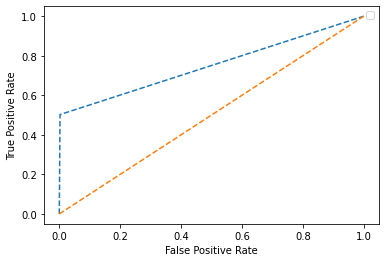

In [33]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot([0, 1], ls="--")
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [34]:
confusion_matrix(y_test, y_pred)

array([[29763,    72],
       [  281,   284]])

In [ ]:
##DIFFERENT ENCODING

In [35]:
#Create metric df to save model results
encoding_metric_df = pd.DataFrame(columns=['encoder','fit_time','score_time', 'acc', 'recall', 'auc', 'precision', 'f1'])

In [36]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.cat_boost.CatBoostEncoder()
X_imp = cbe_encoder.fit_transform(X,y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(cbe_encoder)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

encoding_metric_df = encoding_metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(encoding_metric_df.columns)), ignore_index=True)

In [37]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.MEstimateEncoder()
X_imp = cbe_encoder.fit_transform(X,y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(cbe_encoder)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

encoding_metric_df = encoding_metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(encoding_metric_df.columns)), ignore_index=True)

In [38]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.JamesSteinEncoder()
X_imp = cbe_encoder.fit_transform(X,y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(cbe_encoder)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

encoding_metric_df = encoding_metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(encoding_metric_df.columns)), ignore_index=True)

In [39]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.CountEncoder()
X_imp = cbe_encoder.fit_transform(X, y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

# define the model
model = RandomForestClassifier(n_estimators=50)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_imp_st_n, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(cbe_encoder)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

encoding_metric_df = encoding_metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(encoding_metric_df.columns)), ignore_index=True)

In [40]:
encoding_metric_df.sort_values(by = 'acc', ascending = False)

,encoder,fit_time,score_time,acc,recall,auc,precision,f1
0,"CatBoostEncoder(a=1, cols=['Country', 'League'...",11.5361,0.183084,0.988515,0.51556,0.978585,0.80389,0.627509
2,"JamesSteinEncoder(cols=['Country', 'League', '...",7.79593,0.199408,0.988439,0.512094,0.978851,0.802791,0.624448
1,"MEstimateEncoder(cols=['Country', 'League', 'P...",8.00419,0.202518,0.988401,0.516999,0.976383,0.795353,0.625934
3,"CountEncoder(cols=['Country', 'League', 'Posit...",7.77793,0.201531,0.988146,0.502286,0.976912,0.791681,0.613859


In [45]:
#Encoding the categorival variables using target encoding
cbe_encoder = ce.CatBoostEncoder()
X_imp = cbe_encoder.fit_transform(X,y)

#Standardization 
scaler = StandardScaler()
X_imp_st = scaler.fit_transform(X_imp)
X_imp_st = pd.DataFrame(data = X_imp_st, columns=X_imp.columns)

#Normalization
transformer = MinMaxScaler()
X_imp_st_n = transformer.fit_transform(X_imp_st)
X_imp_st_n = pd.DataFrame(data = X_imp_st_n, columns=X_imp_st.columns)

In [ ]:
#SMOTE

In [53]:
#Create metric df to save model results
smote_metric_df = pd.DataFrame(columns=['encoder','fit_time','score_time', 'acc', 'recall', 'auc', 'precision', 'f1'])

In [54]:
# define the model
model = RandomForestClassifier(n_estimators=50)

#overfit the target label
over = SVMSMOTE(sampling_strategy=0.15)
X_res, y_res = over.fit_resample(X_imp_st_n, y)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_res, y_res, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(over)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

smote_metric_df = smote_metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(smote_metric_df.columns)), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [55]:
# define the model
model = RandomForestClassifier(n_estimators=50)

#overfit the target label
over = BorderlineSMOTE(sampling_strategy=0.15)
X_res, y_res = over.fit_resample(X_imp_st_n, y)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_res, y_res, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(over)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

smote_metric_df = smote_metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(smote_metric_df.columns)), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [56]:
# define the model
model = RandomForestClassifier(n_estimators=50)

#overfit the target label
over = ADASYN(sampling_strategy=0.15)
X_res, y_res = over.fit_resample(X_imp_st_n, y)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

#scoring params
scoring = {'acc': 'accuracy',
           'recall': 'recall',
           'auc': 'roc_auc',
           'precison': 'precision',
           'f1': 'f1'}

# evaluate the model on the dataset
n_scores = cross_validate(model, X_res, y_res, scoring=scoring, cv=cv, n_jobs=-1, return_train_score= False)

to_add = []
to_add.append(over)
# report performance
for key, value in n_scores.items():
    to_add.append(mean(value))
    #print(key, mean(value))

smote_metric_df = smote_metric_df.append(pd.DataFrame(np.array(to_add).reshape(1,-1), columns=list(smote_metric_df.columns)), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [58]:
smote_metric_df.sort_values(by = 'acc', ascending = False)

,encoder,fit_time,score_time,acc,recall,auc,precision,f1
1,"BorderlineSMOTE(k_neighbors=5, kind='borderlin...",14.2003,0.211719,0.990206,0.977651,0.998266,0.948851,0.963026
2,"ADASYN(n_jobs=1, n_neighbors=5, random_state=N...",13.3596,0.216777,0.990122,0.984028,0.999211,0.943315,0.963225
0,"SVMSMOTE(k_neighbors=5, m_neighbors=10, n_jobs...",15.7833,0.220576,0.990115,0.976655,0.997907,0.949074,0.962656


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_imp_st_n, y, test_size=0.33, random_state=42)
over = BorderlineSMOTE(sampling_strategy=0.3)
X_res, y_res = over.fit_resample(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [72]:
m = model.fit(X_res, y_res)
y_pred = m.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.8435308651862531


In [15]:
model = RandomForestClassifier(n_estimators=500)
m = model.fit(X_res, y_res)
y_pred = m.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.8503423697593401


In [16]:
model = RandomForestClassifier(n_estimators=500, max_samples=0.9)
m = model.fit(X_res, y_res)
y_pred = m.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.8519949693817471


In [18]:
zip_iterator = zip(list(X_imp_st_n.columns), m.feature_importances_)
feature_dict = dict(zip_iterator)
dict( sorted(feature_dict.items(), key=operator.itemgetter(1),reverse=True))

{'Country': 0.017643685614252957,
 'DEGREE': 0.019571898724191926,
 'Division': 0.0036091637149077284,
 'Eigv': 0.01991139444976875,
 'IsNational': 0.014840463150467989,
 'League': 0.03044896610280479,
 'National_teammates': 0.03249464828773991,
 'Position': 0.013604777568955626,
 'Skill1': 0.07929100222141357,
 'Skill2': 0.07448695554453033,
 'Skill3': 0.04123642641405295,
 'Skill4': 0.05262557755144457,
 'Skill5': 0.04318799130718434,
 'TOTS_teammates': 0.4618811221168824,
 'Value': 0.09516592723140214}

In [19]:
data['KPI_IsTOTS'] = X_imp_st_n[list(feature_dict.items())[0][0]] * list(feature_dict.items())[0][1] + \
    X_imp_st_n[list(feature_dict.items())[1][0]] * list(feature_dict.items())[1][1] + \
    X_imp_st_n[list(feature_dict.items())[2][0]] * list(feature_dict.items())[2][1] + \
    X_imp_st_n[list(feature_dict.items())[3][0]] * list(feature_dict.items())[3][1] + \
    X_imp_st_n[list(feature_dict.items())[4][0]] * list(feature_dict.items())[4][1] + \
    X_imp_st_n[list(feature_dict.items())[5][0]] * list(feature_dict.items())[5][1] + \
    X_imp_st_n[list(feature_dict.items())[6][0]] * list(feature_dict.items())[6][1] + \
    X_imp_st_n[list(feature_dict.items())[7][0]] * list(feature_dict.items())[7][1] + \
    X_imp_st_n[list(feature_dict.items())[8][0]] * list(feature_dict.items())[8][1] + \
    X_imp_st_n[list(feature_dict.items())[9][0]] * list(feature_dict.items())[9][1] + \
    X_imp_st_n[list(feature_dict.items())[10][0]] * list(feature_dict.items())[10][1] + \
    X_imp_st_n[list(feature_dict.items())[11][0]] * list(feature_dict.items())[11][1] + \
    X_imp_st_n[list(feature_dict.items())[12][0]] * list(feature_dict.items())[12][1] + \
    X_imp_st_n[list(feature_dict.items())[13][0]] * list(feature_dict.items())[13][1] + \
    X_imp_st_n[list(feature_dict.items())[14][0]] * list(feature_dict.items())[14][1]


In [20]:
data.to_excel('data-2.xlsx')